> NOTE: This notebook does some semi complex plotting of mounted sensors at Folger Deep and Folger Pinnacle, and looks into specific, interesting time periods. It uses helper functions from another file but I have still tried to be semi transparent about the key steps like the API call. I am not sure how much backend code we want visible, but I built this notebook so that much of the visible code can be easily minimized.

> TODO: look into current plotting, integrate wind data

In [1]:
# !pip install --upgrade pip
# !pip install onc
# !pip install python-dotenv

# Folger Passage: Key Ocean Health Indicators

![Folger Neptune Map](https://cdn.onc-prod.intergalactic.space/folgerpassage_300dpi_ff2a03c373.jpg)

## Plotting One Year of Data - Folger Deep and Pinnacle

In [ ]:
import onc
import mount_helpers as my_functions # the helper file can be found here: /work/Grace's Github Repo/deepnote/new_helpers.py
import pandas as pd

import os
# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

### 1. Define parameters to query

In [3]:
# Time frame
start_21 = "2021-01-01T00:00:00.000Z"
start_22 = "2022-01-01T00:00:00.000Z"

# Properties available at Folger Deep and Pinnacle
deep_properties = ["oxygen", "salinity", "conductivity", "seawatertemperature", "density"]
pinnacle_properties = ["oxygen", "parphotonbased", "chlorophyll", "salinity", "turbidityntu", "conductivity", "seawatertemperature", "density"]

# Location Codes for Deep and Pinnacle
deep_locationCode = "FGPD"
pinnacle_locationCode = "FGPPN"

# Resample (necessary for time series greater than 1 day)
resample = 1800

### 2. Use parameters to request data via the API 'getScalarData()' call

### 3. Place data from the API response into a Data Frame

In this notebook we actually process the API request and creation of a data frame for each request using a helper function in a different file, as well as the combining of all these data frames to create a singular data frame for each location. This is done to cleanly allow for plotting of many parameters, over different time series, at different locations.

Below you can see the API request for each property at each location, and message indicating the creation of a single data frame with all parameters for each location.

In [4]:
deep_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode=deep_locationCode, propertyCodes=deep_properties, resample=resample, updates=True)

API Request: getScalarData{'locationCode': 'FGPD.O2', 'deviceCategoryCode': 'OXYSENSOR', 'propertyCode': 'oxygen', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg', 'sensorCategoryCodes': 'oxygen_corrected'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': 'salinity', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': 'conductivity', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': '

Here you can view the final data frame generated for the Folger Deep location.

In [5]:
deep_yr_21_indicators

,Oxygen (ml/l),Salinity (psu),Conductivity (S/m),Temperature (°C),Density (kg/m3)
Time,,,,,
2021-01-01 00:15:00+00:00,NaN,31.837662,3.447278,9.368090,1025.020570
2021-01-01 00:45:00+00:00,NaN,31.837139,3.446709,9.362289,1025.019496
2021-01-01 01:15:00+00:00,NaN,31.831736,3.446169,9.362302,1025.013739
2021-01-01 01:45:00+00:00,NaN,31.826527,3.445631,9.362097,1025.008372
2021-01-01 02:15:00+00:00,NaN,31.814458,3.444649,9.364466,1024.997534
...,...,...,...,...,...
2021-12-31 21:45:00+00:00,NaN,31.523383,3.481308,10.118536,1024.651376
2021-12-31 22:15:00+00:00,NaN,31.522272,3.481728,10.124838,1024.647840
2021-12-31 22:45:00+00:00,NaN,31.522845,3.482330,10.131310,1024.645672


Similarly, for Folger Pinnacle.

In [6]:
pin_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode=pinnacle_locationCode, propertyCodes=pinnacle_properties, resample=resample, updates= True)

API Request: getScalarData{'locationCode': 'FGPPN', 'deviceCategoryCode': 'OXYSENSOR', 'propertyCode': 'oxygen', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg', 'sensorCategoryCodes': 'oxygen_corrected'}
API Request: getScalarData{'locationCode': 'FGPPN', 'deviceCategoryCode': 'radiometer', 'propertyCode': 'parphotonbased', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPPN', 'deviceCategoryCode': 'FLNTU', 'propertyCode': 'chlorophyll', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPPN', 'deviceCategoryCode': 'CTD', 'p

In [7]:
pin_yr_21_indicators

,Oxygen (ml/l),PAR (µmol/m²/s),Chlorophyll (µg/l),Salinity (psu),Turbidity (NTU),Conductivity (S/m),Temperature (°C),Density (kg/m3)
Time,,,,,,,,
2021-01-01 00:15:00+00:00,6.418278,0.011267,0.173206,29.356030,0.823635,3.181388,9.125013,1022.789966
2021-01-01 00:45:00+00:00,6.417333,0.000056,0.168771,29.282496,0.782812,3.170472,9.079078,1022.737772
2021-01-01 01:15:00+00:00,6.372171,0.000058,0.159257,29.251519,0.707104,3.163149,9.025827,1022.719933
2021-01-01 01:45:00+00:00,6.365439,0.000060,0.156167,29.233654,0.690834,3.161048,9.021572,1022.705259
2021-01-01 02:15:00+00:00,6.452396,0.000057,0.155061,29.164227,0.669201,3.150408,8.973576,1022.657068
...,...,...,...,...,...,...,...,...
2021-12-31 21:45:00+00:00,NaN,0.034832,NaN,30.222132,NaN,3.196448,8.280649,1023.586892
2021-12-31 22:15:00+00:00,NaN,0.034830,NaN,30.254641,NaN,3.206676,8.367470,1023.598297
2021-12-31 22:45:00+00:00,NaN,0.034831,NaN,30.225979,NaN,3.192725,8.230905,1023.593690


### 4. Plot using Data Frames

First, let's plot all the properties in the Folger Deep data frame.

start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


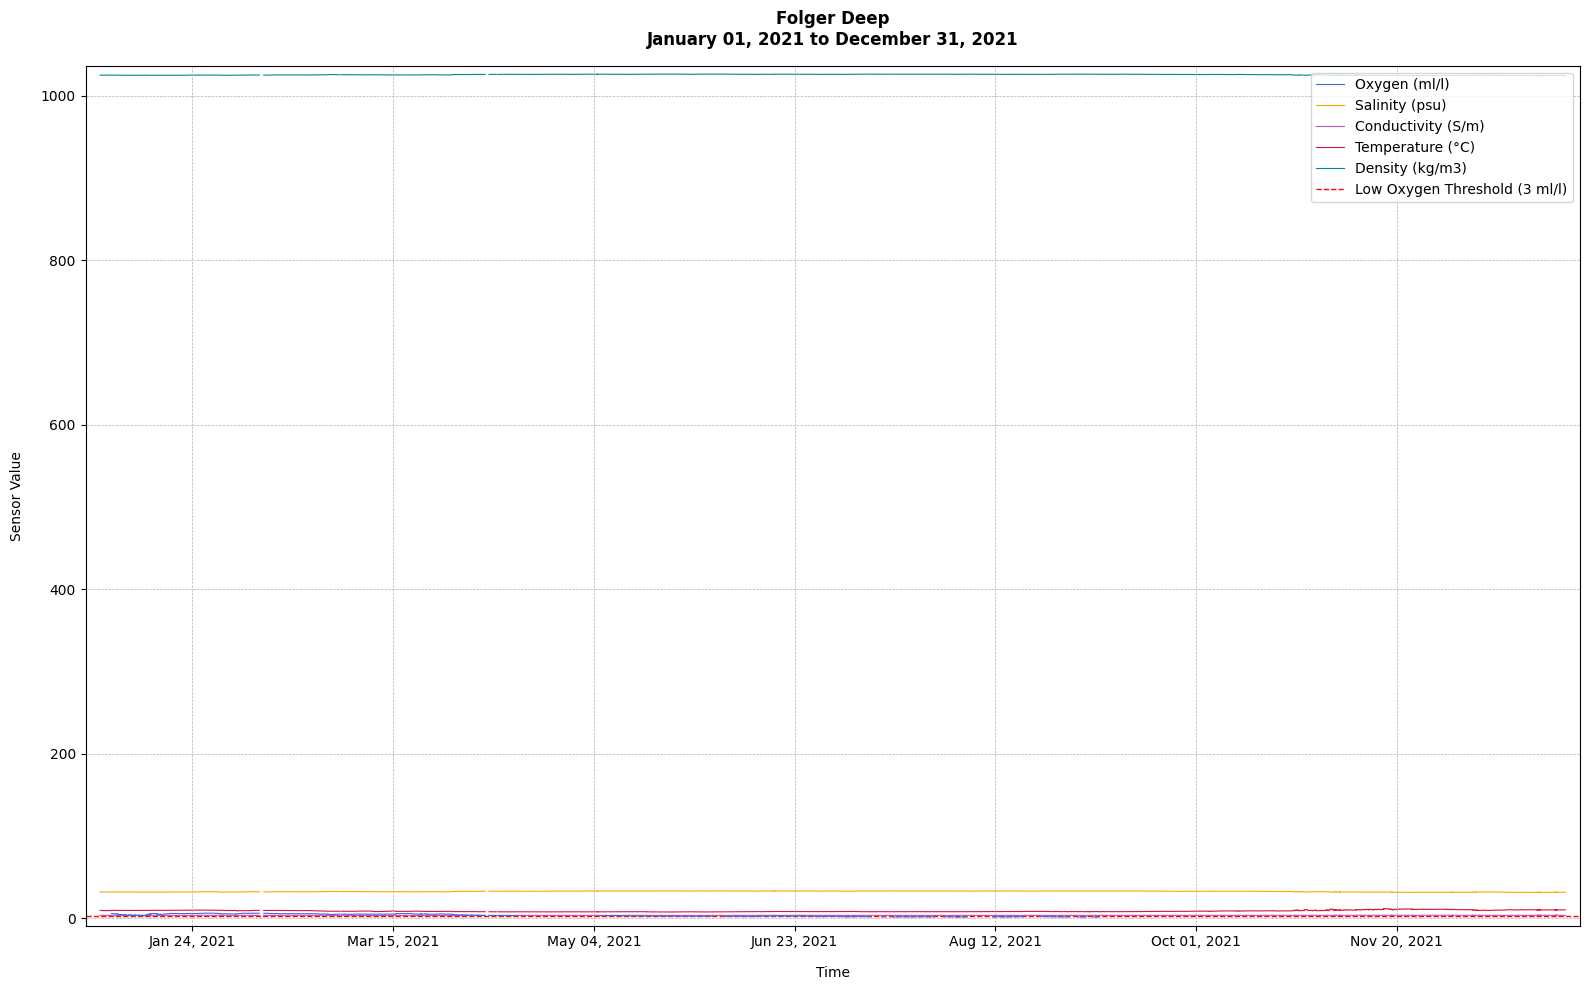

In [8]:
my_functions.plot_dataframe(df=deep_yr_21_indicators, locationCode="FGPD")

> Notice that the absolute scale is too great to view all parameters together. Alternatively, we can specify the columns of the data frame we want plotted. Below, for example, we select the columns "Oxygen (ml/l)", "Salinity (psu)", and "Temperature (°C)" to plot.

start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


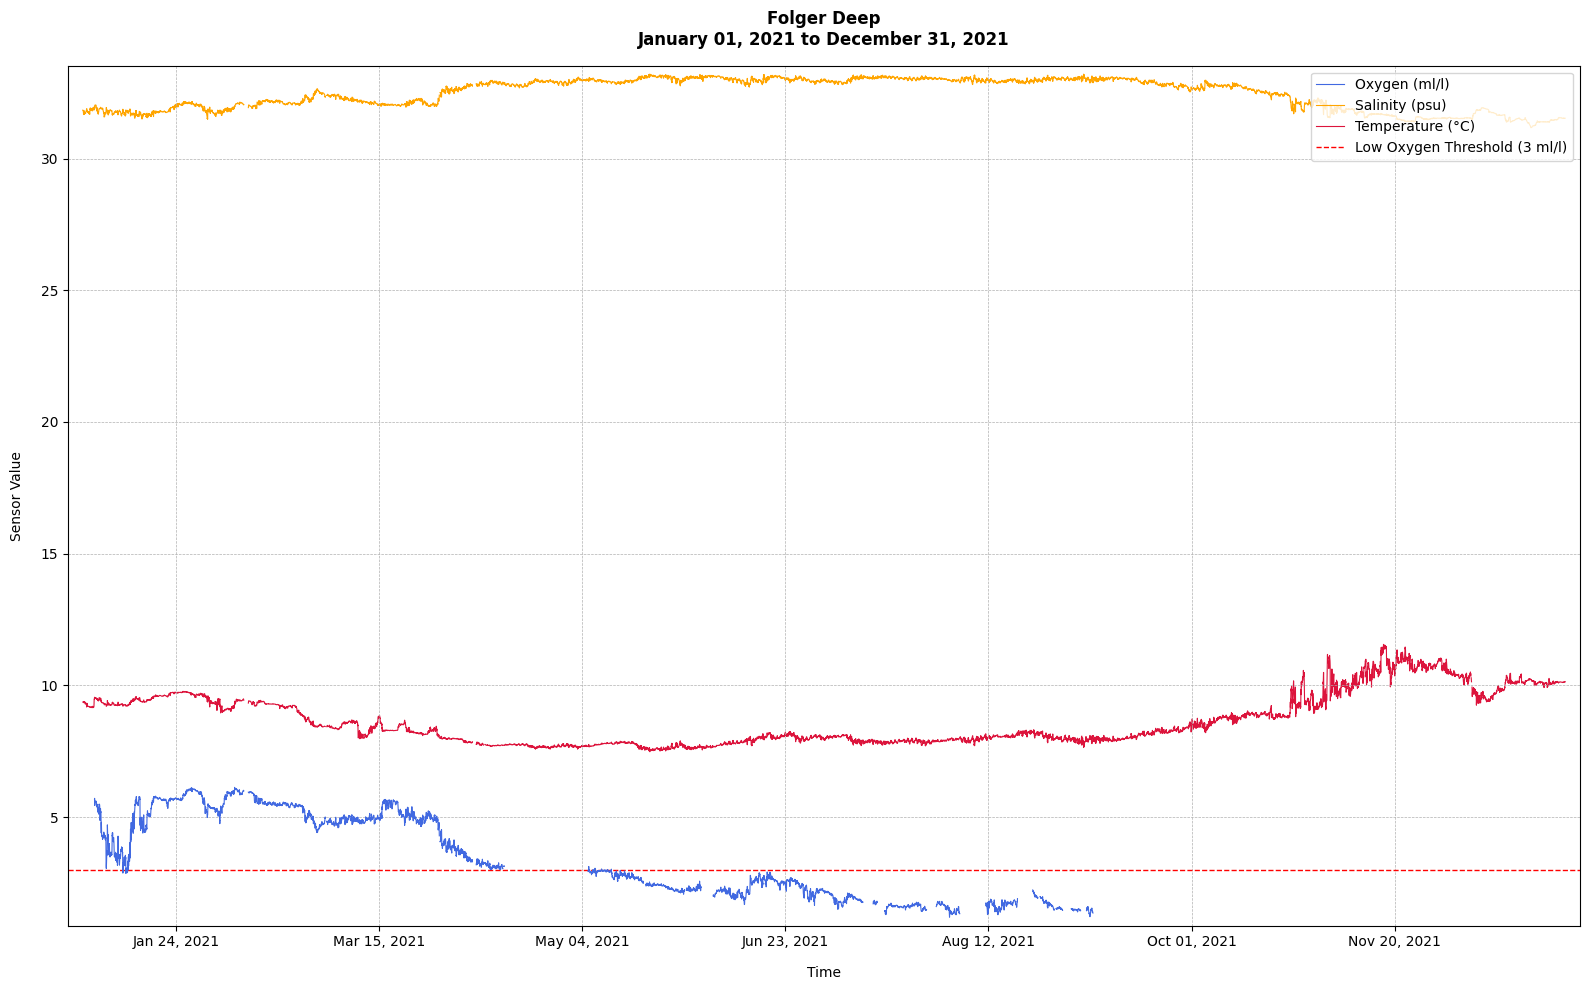

In [9]:
my_functions.plot_dataframe(df=deep_yr_21_indicators[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

And here we choose to plot "Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)" from Folger Pinnacle.

start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


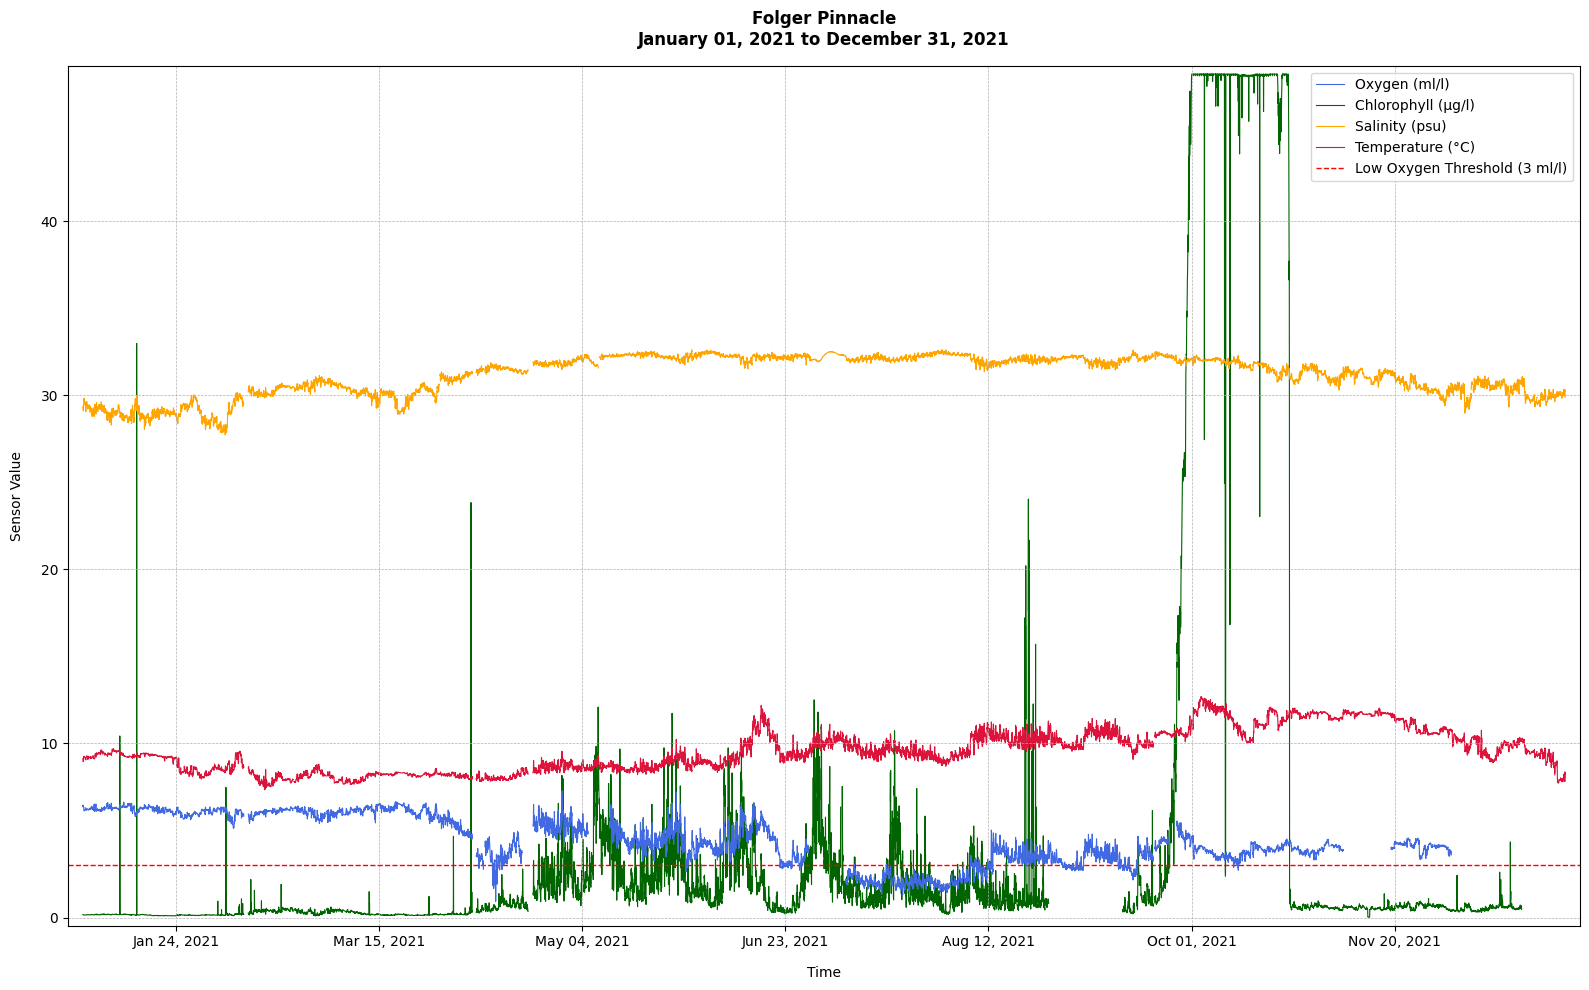

In [10]:
my_functions.plot_dataframe(df=pin_yr_21_indicators[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

## Plotting Smaller Time Series

Instead of making repeated API calls, we can use the full-year data frame we already generated to extract smaller time periods of interest. This avoids unnecessary API requests which are time and resource intensive.

### 1. Define your smaller times

 From looking at the year long plots above we can identify several time periods that would prompt further investigation including:

- A seasonal view - April through October

- Low oxygen - July through August

- High chlorophyll - several times, April through October 

In [11]:
# TODO: add diff time frames for high chlorophyll

> NOTE: We define our dates as strings using the following ISO 8601 UTC format: "YYYY-MM-DDTHH:MM:SS.sssZ"

In [12]:
# Define ISO 8601 date strings
apr_21_str = "2021-04-01T00:00:00.000Z"
nov_21_str = "2021-11-15T00:00:00.000Z"
jul_21_str = "2021-07-01T00:00:00.000Z"
aug_21_str = "2021-10-01T12:00:00.000Z"
sept_21_str = "2021-09-15T00:00:00.000Z"

### 2. Convert dates to Pandas Timestamp objects

As mentioned above, we use this specific format to define our dates, and then we convert them Pandas 'Timestamp' objects. This is necessary for the next step.

In [13]:
# Convert string dates to pandas Timestamps
apr_21 = pd.to_datetime(apr_21_str)
nov_21 = pd.to_datetime(nov_21_str)
jul_21 = pd.to_datetime(jul_21_str)
aug_21 = pd.to_datetime(aug_21_str)
sept_21 = pd.to_datetime(sept_21_str)

### 3. Create new Data Frames by 'slicing' the original one

Now that the timestamps are defined, we use them to slice specific time-based subsets of the full data frame. This is done using 'dataframe.loc[start:stop]', which selects only the rows from the data frame that fall between two dates.

In [14]:
# Deep: Slice views of the full-year data
deep_season_df = deep_yr_21_indicators.loc[apr_21:nov_21]
deep_low_ox_df = deep_yr_21_indicators.loc[jul_21:aug_21]
deep_high_chlor_df = deep_yr_21_indicators.loc[sept_21:nov_21]

# Pinnacle: Slice views of the full-year data
pin_season_df = pin_yr_21_indicators.loc[apr_21:nov_21]
pin_low_ox_df = pin_yr_21_indicators.loc[jul_21:aug_21]
pin_high_chlor_df = pin_yr_21_indicators.loc[sept_21:nov_21]

### 4. Plot using Data Frames

#### Seasonal View (April Through November)

start df: 2021-04-01 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


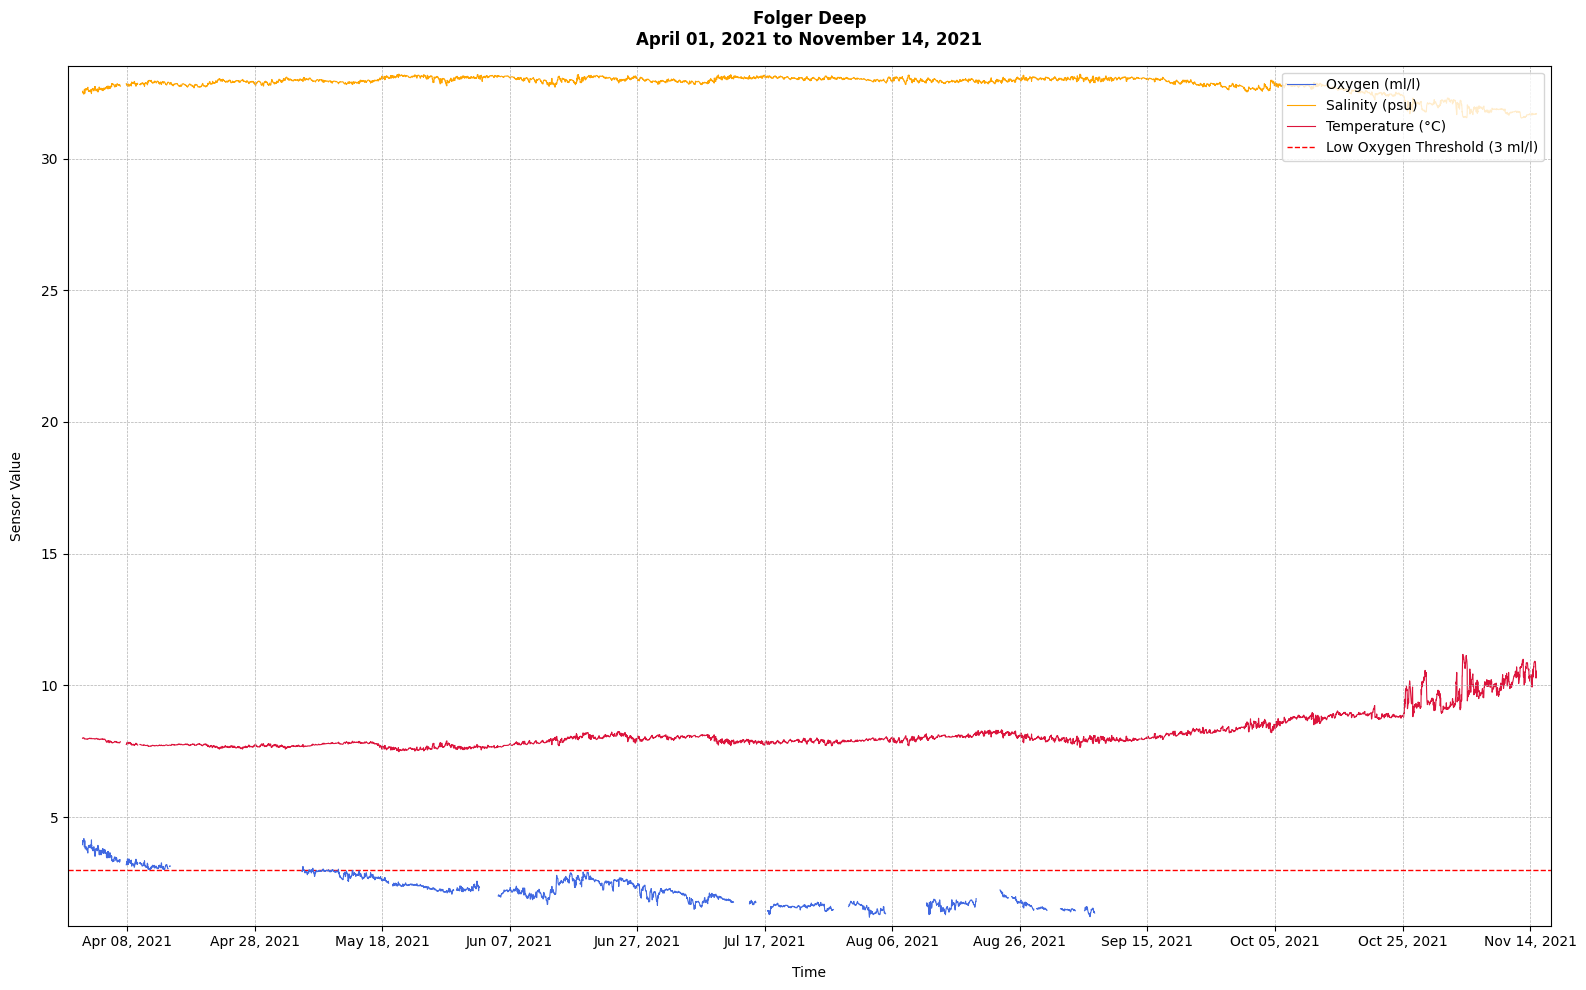

In [15]:
my_functions.plot_dataframe(df=deep_season_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

start df: 2021-04-01 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


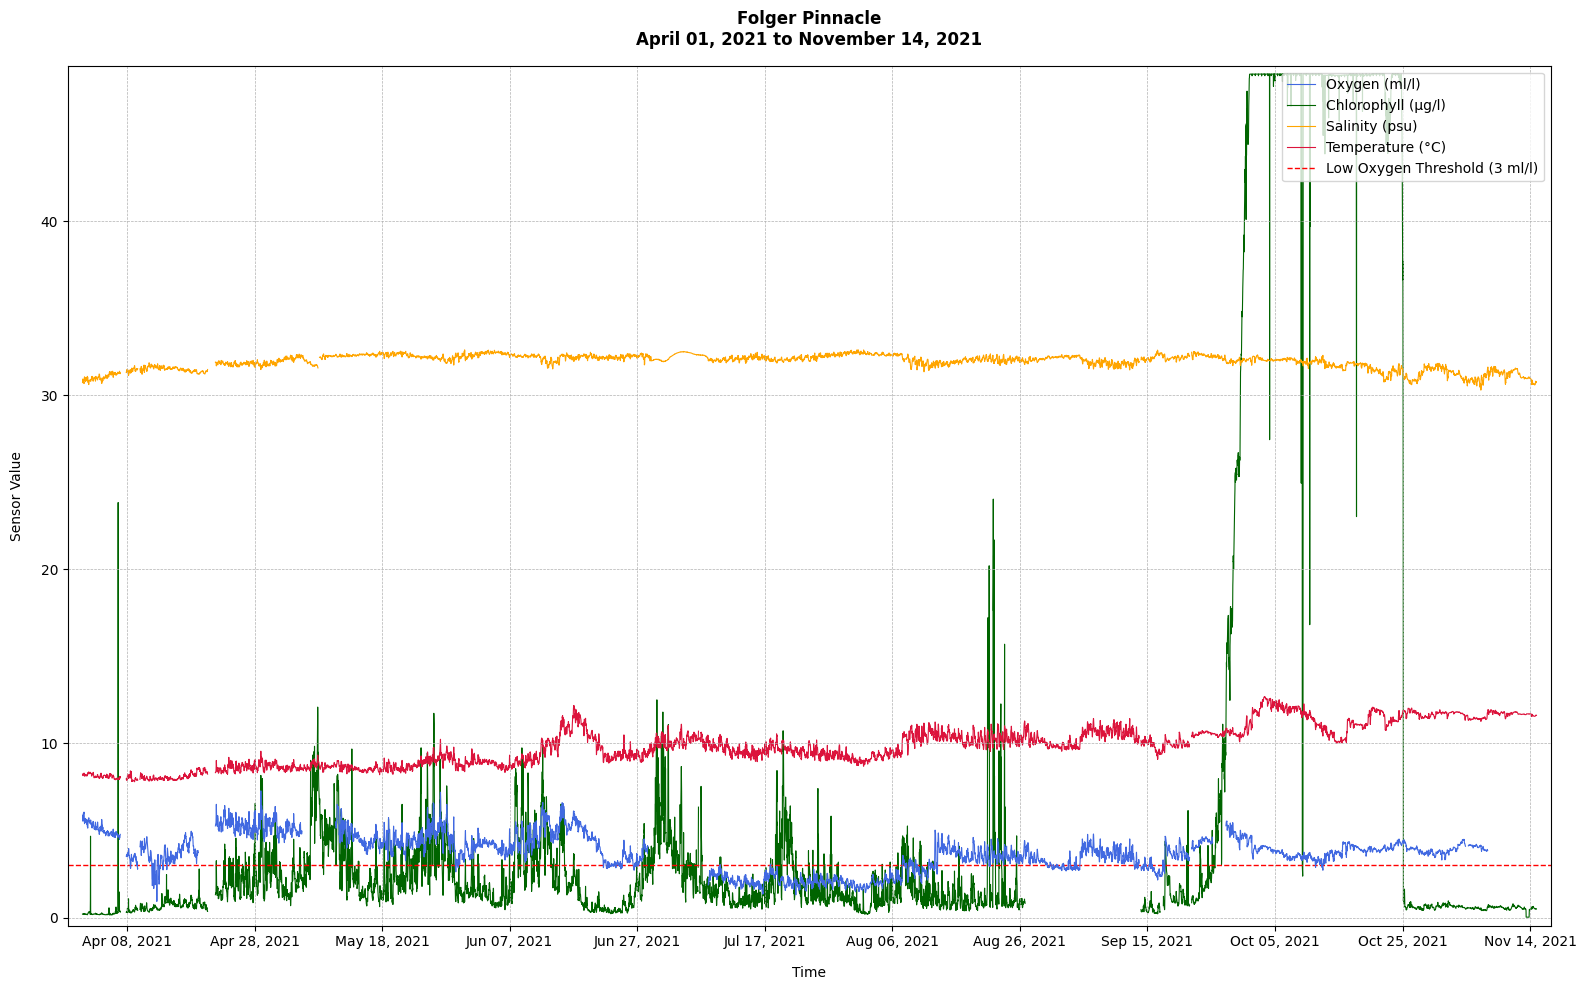

In [16]:
my_functions.plot_dataframe(df=pin_season_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

#### Low Oxygen (July through August)

start df: 2021-07-01 00:15:00+00:00, end: 2021-10-01 11:45:00+00:00


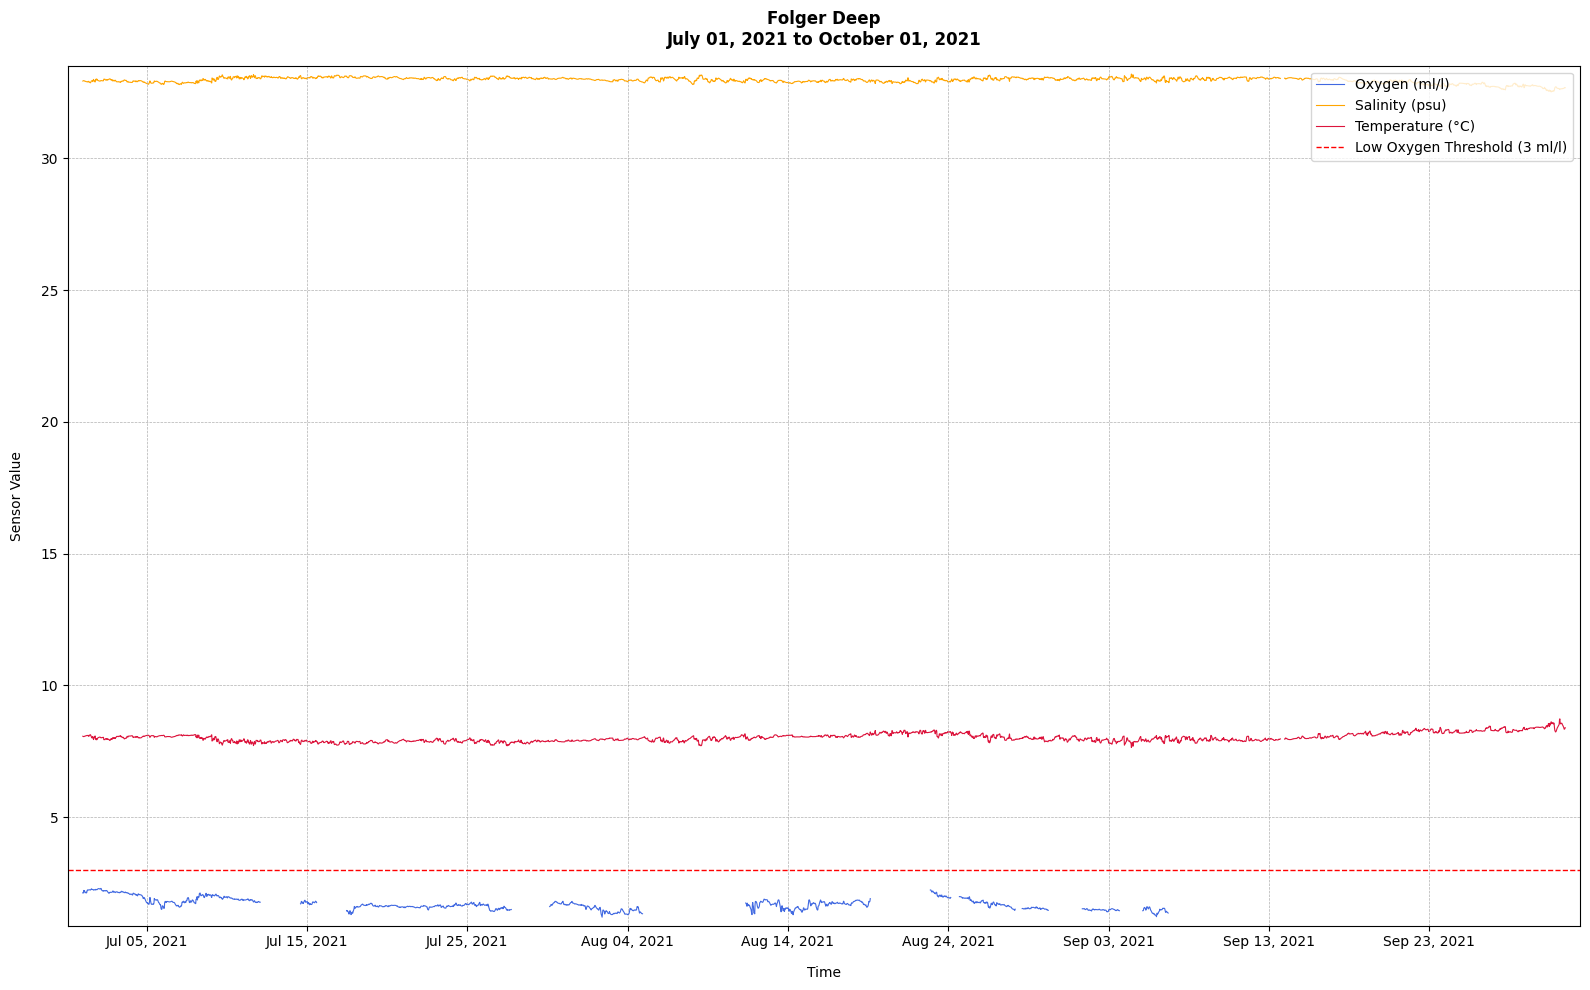

In [17]:
my_functions.plot_dataframe(df=deep_low_ox_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

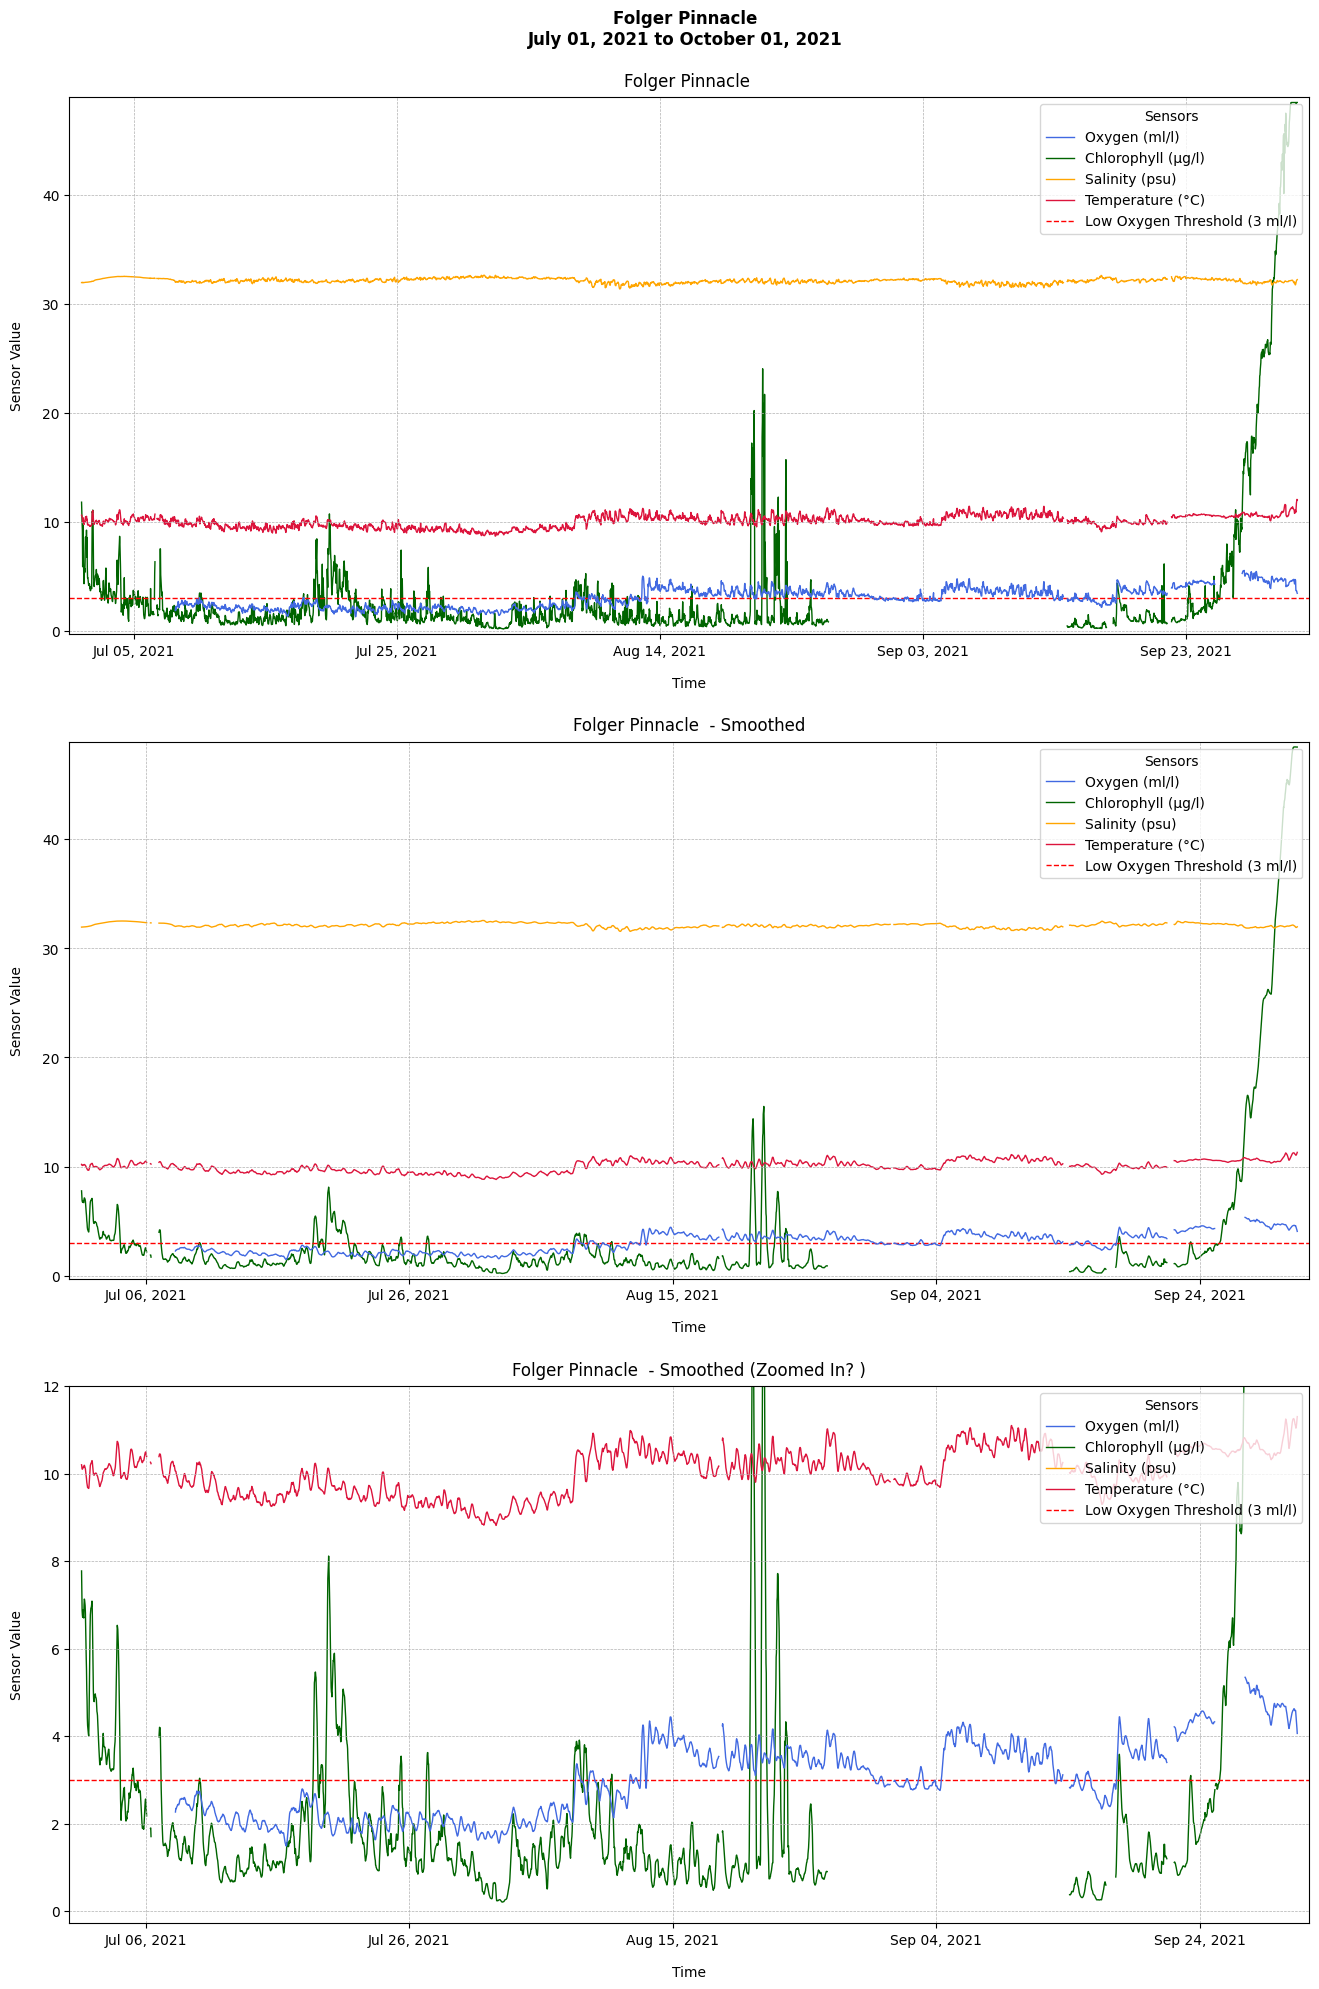

In [18]:
my_functions.plot_dataframe_norm_and_scale(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN", ymax=12)

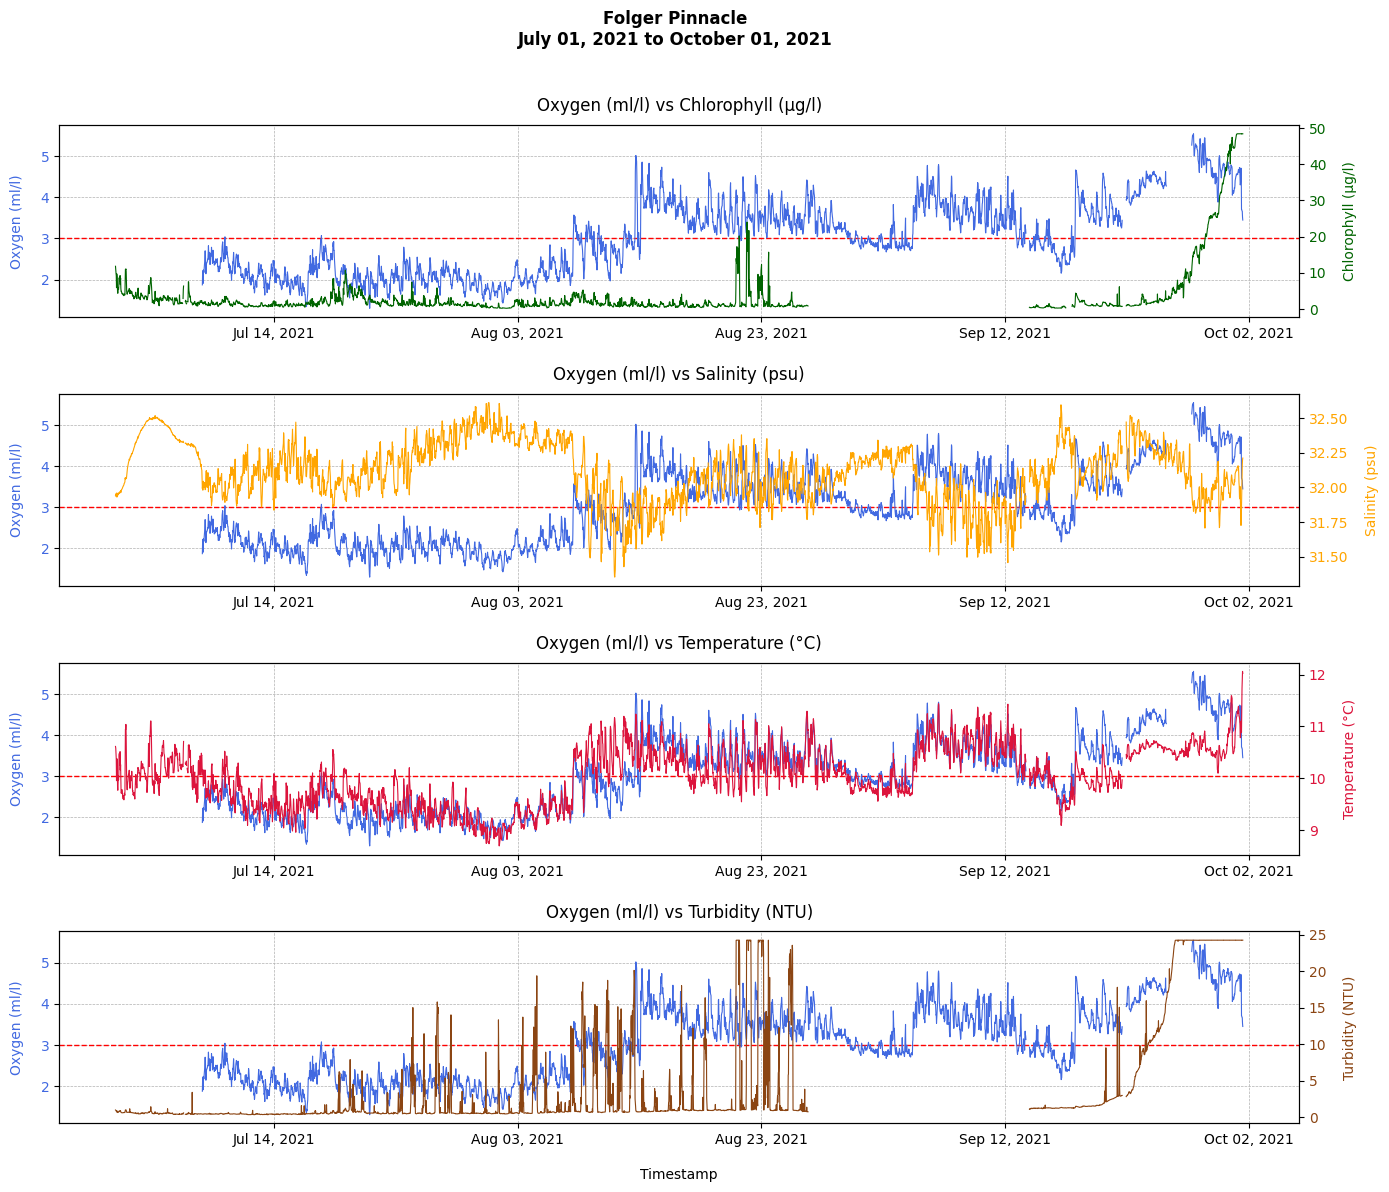

In [19]:
my_functions.subplot_all_with_oxygen(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)", "Turbidity (NTU)"]], locationCode="FGPPN")

#### High Chlorophyll

start df: 2021-09-15 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


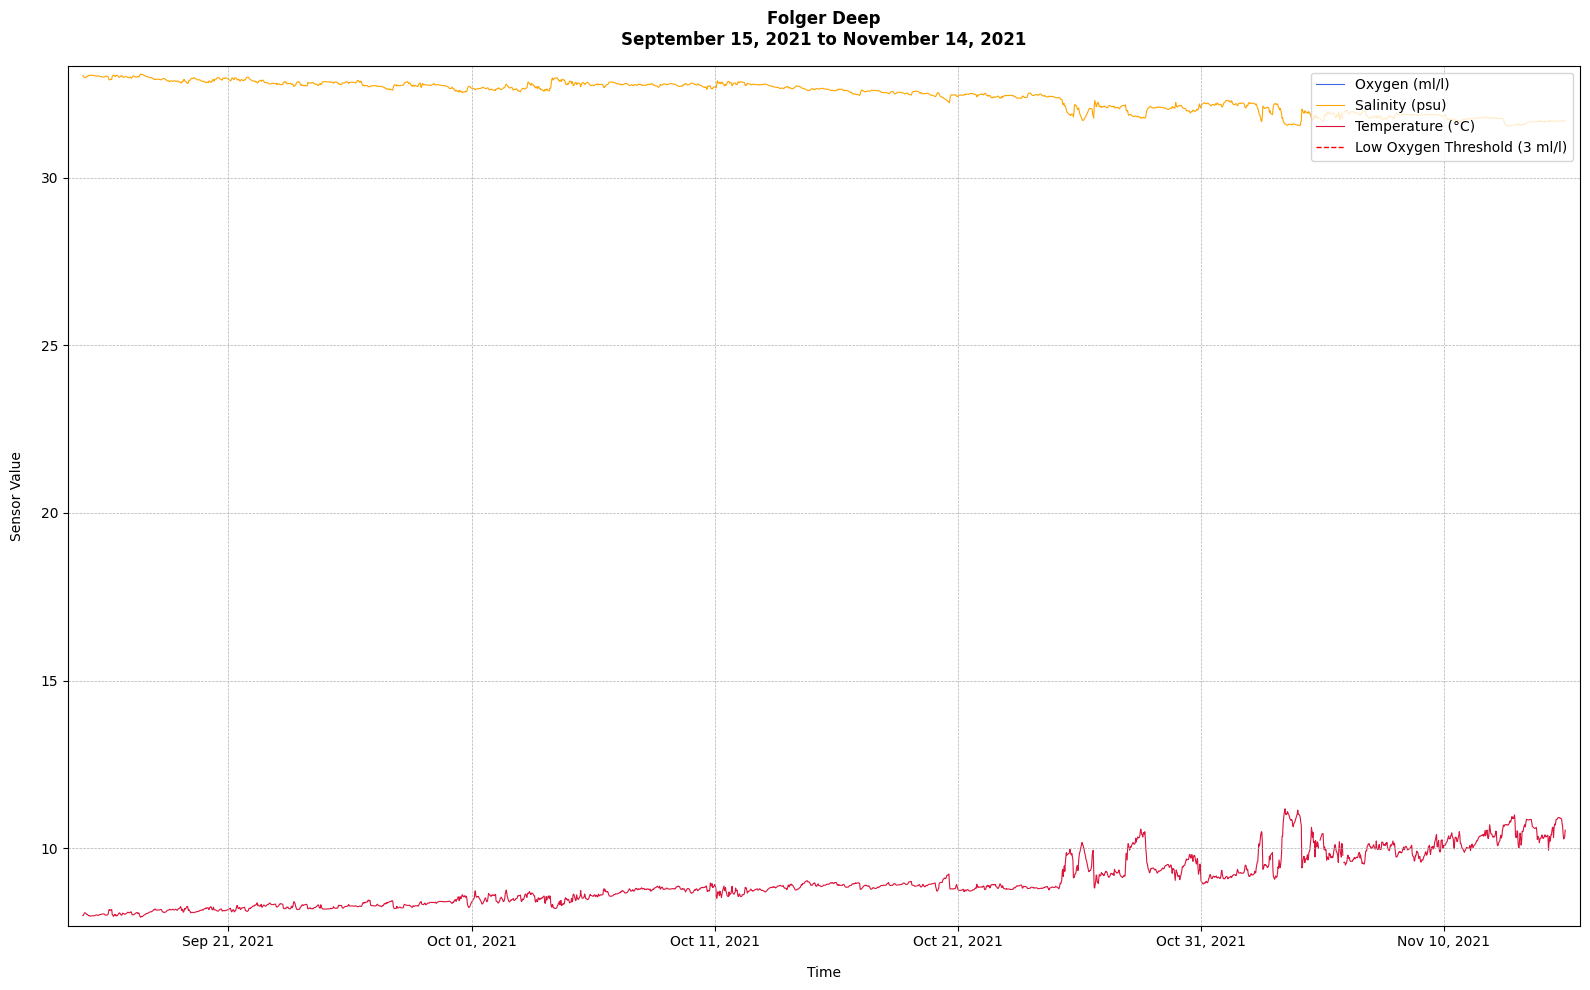

In [20]:
my_functions.plot_dataframe(df=deep_high_chlor_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

start df: 2021-09-15 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


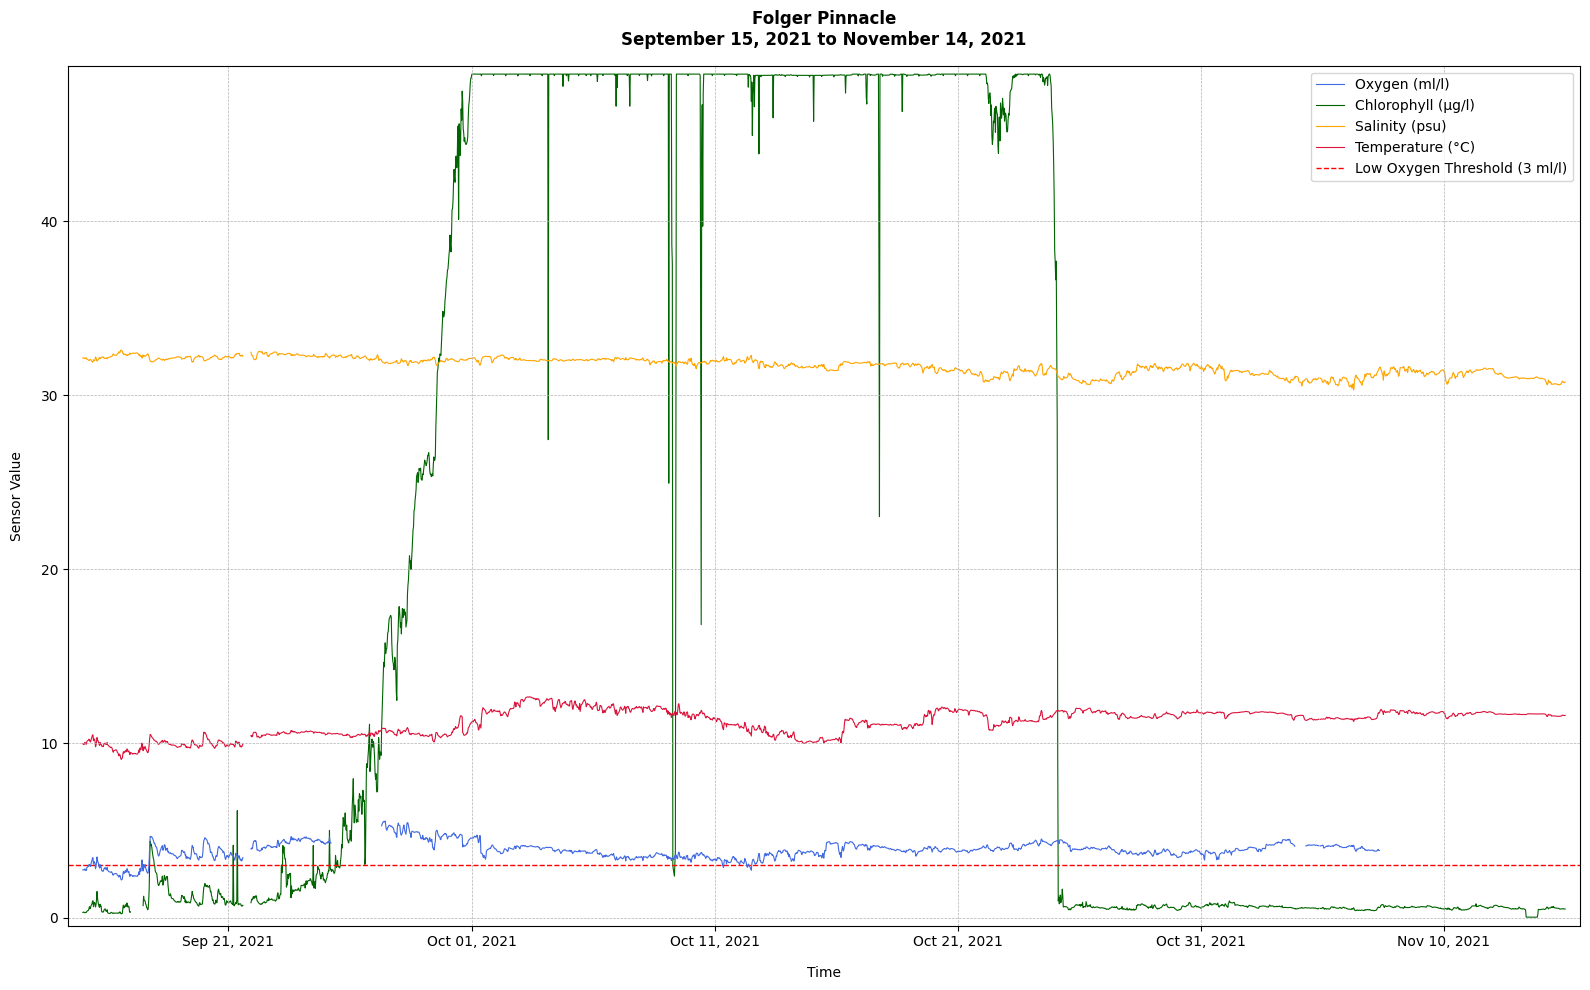

In [21]:
my_functions.plot_dataframe(df=pin_high_chlor_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

Other kinds of plots- subplot all properties in data frame against time

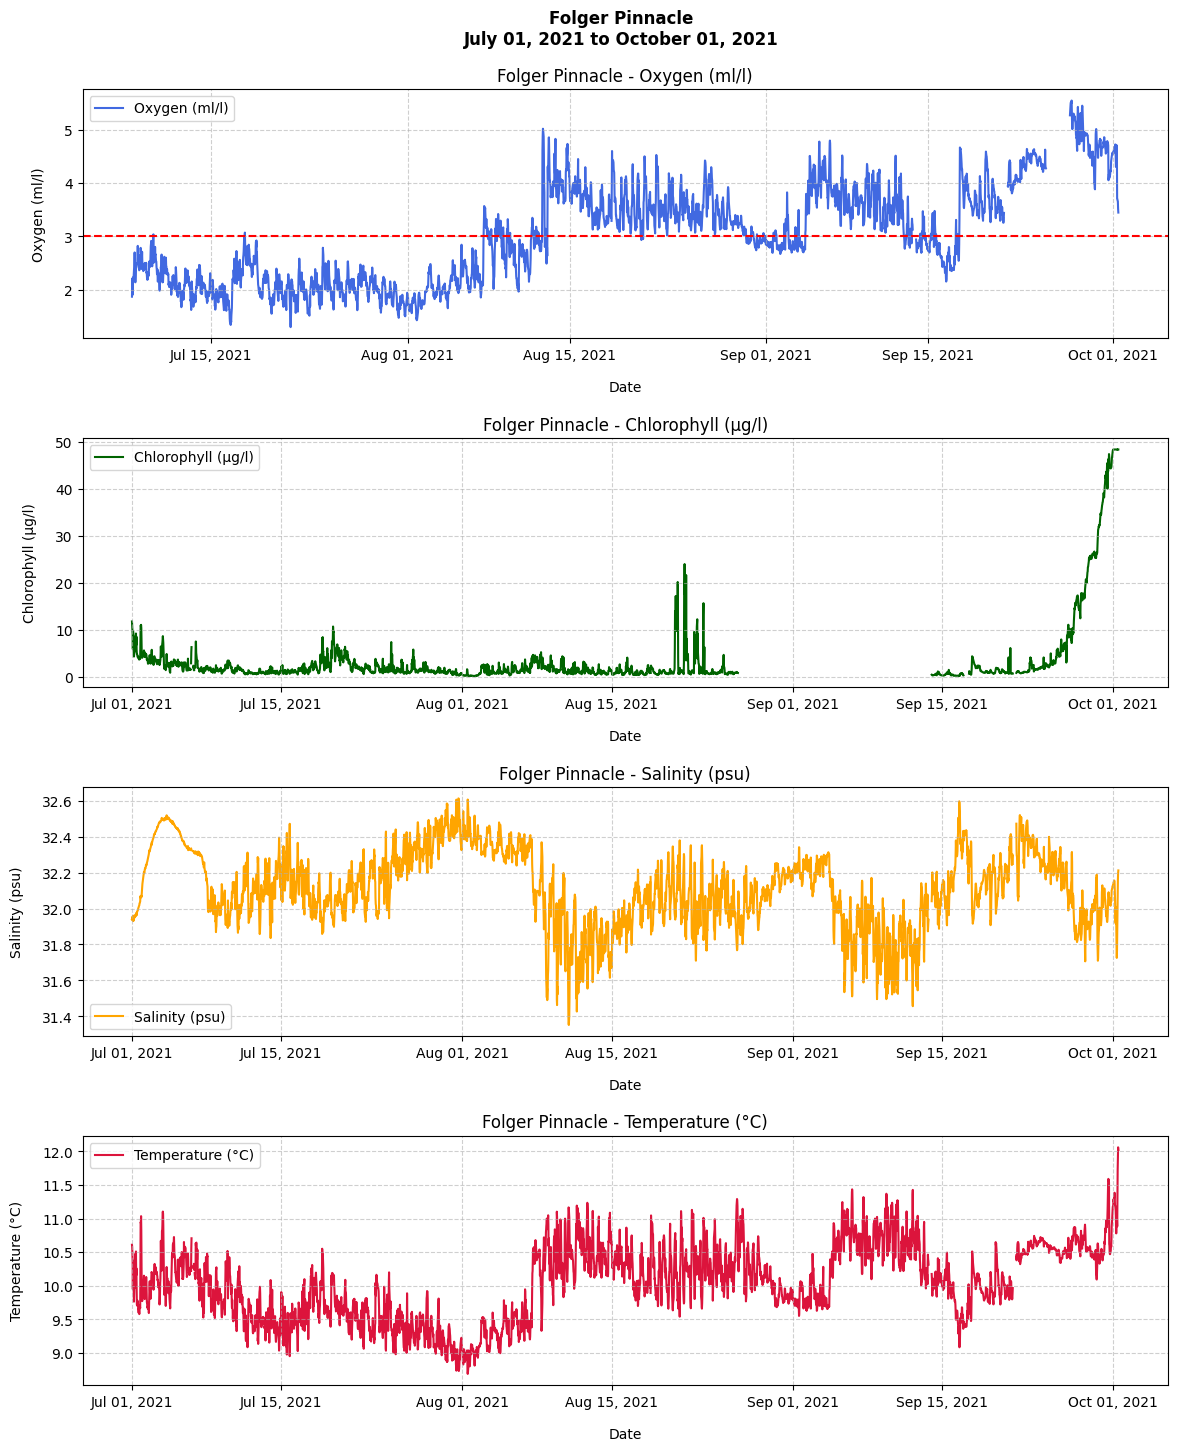

In [22]:
my_functions.subplot_dataframe(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>